In this project, we will analyse a UFC fight dataset. The dataset is a public dataset from kaggle.com. We will try to find trends in data, find features that are important to win a fight in the UFC, analyze our results and compare with bookies odds. We will also look for coming up with strategies that 

Import library panda for data manipulation and analysis. Read the file with read_csv() command and store the data in an object fighter_db. This is our data frame and we will use it for our analysis and operations.

In [2]:
import pandas as pd
fighter_db = pd.read_csv('cleanData.csv')

fighter_db.head() helps us peek at the top 5 rows of the data frame.

In [3]:
fighter_db.head()

,Events,Favourite,Underdog,Label,REACH_delta,SLPM_delta,SAPM_delta,STRA_delta,STRD_delta,TD_delta,TDA_delta,TDD_delta,SUBA_delta,Odds_delta,Sum_delta
0,UFC 159 - Jones vs. Sonnen,Jon Jones,Chael Sonnen,Favourite,10,1.17,0.90,0.12,0.03,-1.56,-0.07,0.28,0.2,-7.87,2.60
1,UFC 159 - Jones vs. Sonnen,Leonard Garcia,Cody McKenzie,Underdog,-3,1.03,2.29,-0.10,-0.15,-2.20,0.01,0.28,-2.0,1.40,2.00
2,UFC Fight Night 34 - Saffiedine vs. Lim,Mairbek Taisumov,Tae Hyun Bang,Favourite,2,0.54,0.08,0.05,-0.05,1.75,0.44,0.28,-0.5,-2.89,5.04
3,UFC Fight Night 91 - McDonald vs. Lineker,Cody Pfister,Scott Holtzman,Underdog,4,-3.15,-0.85,-0.24,-0.06,0.55,-0.27,-0.58,-0.4,6.89,-0.86
4,UFC Fight Night 91 - McDonald vs. Lineker,Matthew Lopez,Rani Yahya,Underdog,2,0.02,0.86,0.13,-0.06,-0.08,0.51,0.37,-0.5,0.81,3.18


fighterdb_tail() helps us peek at the bottom 5 rows of the data frame.

In [4]:
fighter_db.tail()

,Events,Favourite,Underdog,Label,REACH_delta,SLPM_delta,SAPM_delta,STRA_delta,STRD_delta,TD_delta,TDA_delta,TDD_delta,SUBA_delta,Odds_delta,Sum_delta
1310,UFC Fight Night 91 - McDonald vs. Lineker,Aleksei Oleinik,Daniel Omielanczuk,Underdog,6,-1.43,-0.58,-0.18,-0.01,2.53,0.17,-0.20,2.3,-1.22,6.26
1311,UFC Fight Night 91 - McDonald vs. Lineker,Kyle Noke,Keita Nakamura,Underdog,3,0.89,-1.46,0.13,0.07,-0.47,-0.01,0.04,0.3,-0.87,3.41
1312,UFC Fight Night 91 - McDonald vs. Lineker,Lauren Murphy,Katlyn Chookagian,Underdog,-1,-0.03,-0.02,0.13,-0.11,1.00,0.25,0.11,0.0,-1.14,4.96
1313,UFC Fight Night 91 - McDonald vs. Lineker,Sam Alvey,Eric Spicely,Favourite,2,1.68,2.21,-0.19,-0.02,-3.79,-0.22,0.85,-3.6,-2.07,-1.04
1314,UFC Fight Night 91 - McDonald vs. Lineker,Cristina Stanciu,Cortney Casey,Underdog,-3,-1.97,-0.82,0.10,0.02,0.40,0.34,0.18,1.5,0.72,4.04


fighter_db.info() gives us information about the data like number of rows, number of columns, data types of the columns, memory usage. This is done so that you get to know your data and metadata which is always a good practice.

In [5]:
fighter_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 15 columns):
Events         1315 non-null object
Favourite      1315 non-null object
Underdog       1315 non-null object
Label          1315 non-null object
REACH_delta    1315 non-null int64
SLPM_delta     1315 non-null float64
SAPM_delta     1315 non-null float64
STRA_delta     1315 non-null float64
STRD_delta     1315 non-null float64
TD_delta       1315 non-null float64
TDA_delta      1315 non-null float64
TDD_delta      1315 non-null float64
SUBA_delta     1315 non-null float64
Odds_delta     1315 non-null float64
Sum_delta      1315 non-null float64
dtypes: float64(10), int64(1), object(4)
memory usage: 154.2+ KB


fighter_db.mean(axis=0) shows us the mean values of the columns (axis=0).

In [6]:
fighter_db.mean(axis=0)

REACH_delta    0.219011
SLPM_delta     0.264205
SAPM_delta    -0.302084
STRA_delta     0.013338
STRD_delta     0.017886
TD_delta       0.280897
TDA_delta      0.052259
TDD_delta      0.055749
SUBA_delta     0.103194
Odds_delta    -0.859810
Sum_delta      4.133087
dtype: float64

We use shape to see the number of rows and columns.

In [7]:
fighter_db.shape

(1315, 15)

We use describe to describe the data frame.

In [8]:
fighter_db.describe

<bound method NDFrame.describe of                                           Events             Favourite  \
0                     UFC 159 - Jones vs. Sonnen             Jon Jones   
1                     UFC 159 - Jones vs. Sonnen        Leonard Garcia   
2        UFC Fight Night 34 - Saffiedine vs. Lim      Mairbek Taisumov   
3      UFC Fight Night 91 - McDonald vs. Lineker          Cody Pfister   
4      UFC Fight Night 91 - McDonald vs. Lineker         Matthew Lopez   
5            UFC on Fox 20 - Holm vs. Shevchenko            Holly Holm   
6            UFC on Fox 20 - Holm vs. Shevchenko         Edson Barboza   
7            UFC on Fox 20 - Holm vs. Shevchenko      Bojan Mihajlovic   
8            UFC on Fox 20 - Holm vs. Shevchenko         Kailin Curran   
9            UFC on Fox 20 - Holm vs. Shevchenko         Frankie Saenz   
10           UFC on Fox 20 - Holm vs. Shevchenko         Darren Elkins   
11           UFC on Fox 20 - Holm vs. Shevchenko    Alexander Yakovlev   
12  

Label - This is the response variable. Either Favourite or Underdog will win
REACH - Fighter's reach
SLPM - Significant Strikes Landed per Minute
STRA. - Significant Striking Accuracy
SAPM - Significant Strikes Absorbed per Minute
STRD - Significant Strike Defence (the % of opponents strikes that did not land)
TD - Average Takedowns Landed per 15 minutes
TDA - Takedown Accuracy
TDD - Takedown Defense (the % of opponents TD attempts that did not land)
SUBA - Average Submissions Attempted per 15 minutes
Odds - Fighter's decimal odds spread for that specific matchup

We will import other libraries for exploratory data analysis and our data analysis.
Numpy is a library for large, multi-dimensional arrays and matrices with a large collection of high-level mathematical functions to operate on these arrays.
Matplotlib is a plotting library.
Seaborn provides high level interface to draw statistical graphs.
Scipy is used for variety of high level mathematical functions.
We will apply 3 machine learning algorithms namely Random Forest, Logistic Regression and Multi Layer Perceptron. We import these from sklearn which features various classification, regression and clustering algorithms.


In [9]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_val_predict
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score, classification_report, make_scorer, accuracy_score
import warnings
import time
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
We define a function log_progress for starting the main task.

SyntaxError: invalid syntax (<ipython-input-10-73a769fb0e85>, line 1)

In [37]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

We create a function create dummies to as the name suggest create dummy columns for one hot encoding. This is done to convert categorical variables to a form that can be provided to the ML algorithm for getting better results.

In [38]:
def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

We import the library missingno to analyse missing data in our data frame. There are no missing values since the dendrogram is stagnant at y=0 and the bar graph confirms it.

In [39]:
import missingno as msno

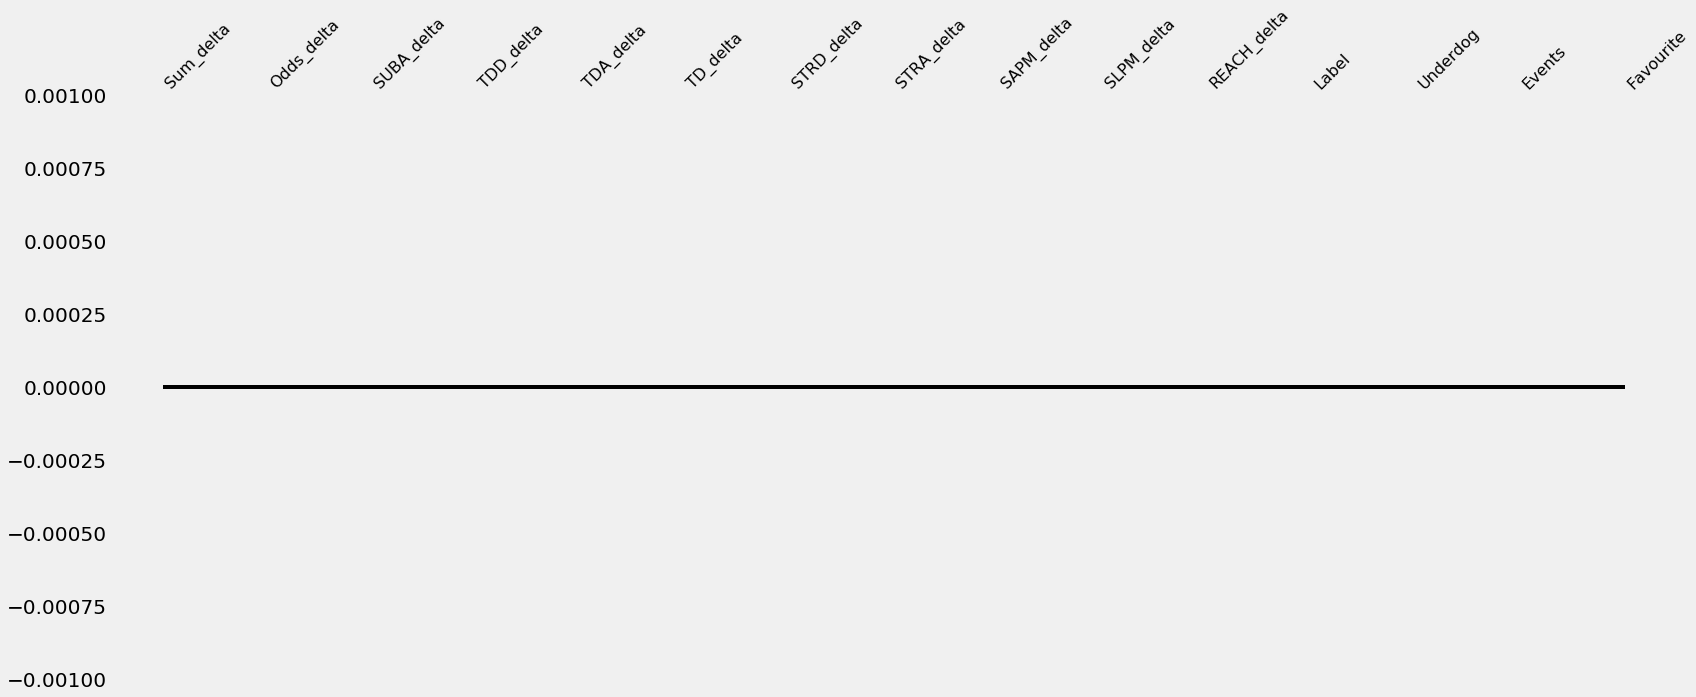

In [40]:
msno.dendrogram(fighter_db) #Check for missing numbers

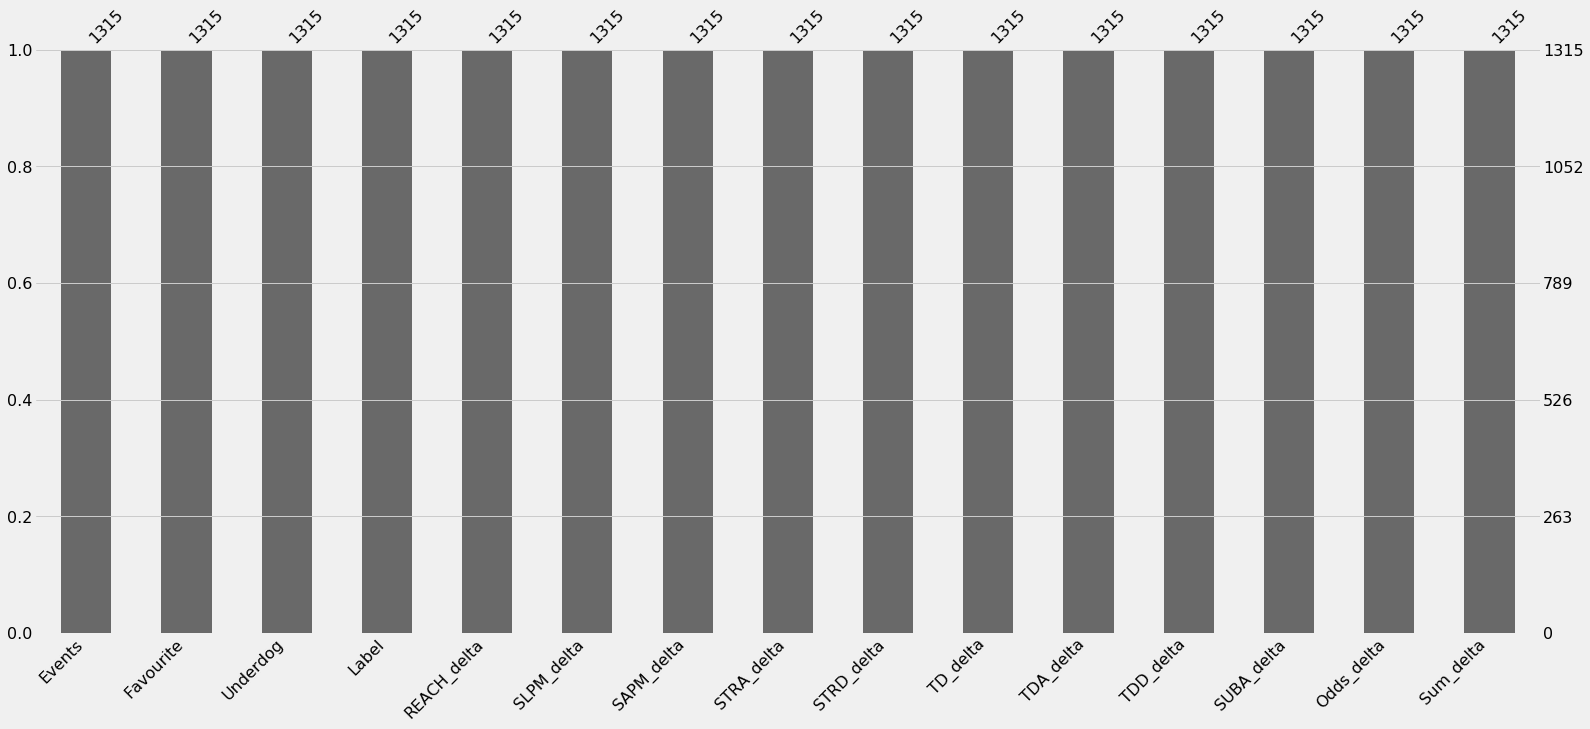

In [41]:
msno.bar(fighter_db)

In [42]:
fighter_db.dtypes #Data types of columns

Events          object
Favourite       object
Underdog        object
Label           object
REACH_delta      int64
SLPM_delta     float64
SAPM_delta     float64
STRA_delta     float64
STRD_delta     float64
TD_delta       float64
TDA_delta      float64
TDD_delta      float64
SUBA_delta     float64
Odds_delta     float64
Sum_delta      float64
dtype: object

We check the count of the Label which describes the winner. The favourite fighters have won 825 times and the underdogs have won 490 times. 

In [43]:
fighter_db['Label'].value_counts() #Favourite and Underdog win count

Favourite    825
Underdog     490
Name: Label, dtype: int64

In [44]:
Favourite_win_percent = fighter_db['Label'].value_counts()/len(fighter_db)
Favourite_win_percent

Favourite    0.627376
Underdog     0.372624
Name: Label, dtype: float64

Favourite Fighters have a 62.73 win rate which shows that if you consistently bet on favourites, you will win 63 times out of 100

In [45]:
df = fighter_db

In [46]:
df

,Events,Favourite,Underdog,Label,REACH_delta,SLPM_delta,SAPM_delta,STRA_delta,STRD_delta,TD_delta,TDA_delta,TDD_delta,SUBA_delta,Odds_delta,Sum_delta
0,UFC 159 - Jones vs. Sonnen,Jon Jones,Chael Sonnen,Favourite,10,1.17,0.90,0.12,0.03,-1.56,-0.07,0.28,0.2,-7.87,2.60
1,UFC 159 - Jones vs. Sonnen,Leonard Garcia,Cody McKenzie,Underdog,-3,1.03,2.29,-0.10,-0.15,-2.20,0.01,0.28,-2.0,1.40,2.00
2,UFC Fight Night 34 - Saffiedine vs. Lim,Mairbek Taisumov,Tae Hyun Bang,Favourite,2,0.54,0.08,0.05,-0.05,1.75,0.44,0.28,-0.5,-2.89,5.04
3,UFC Fight Night 91 - McDonald vs. Lineker,Cody Pfister,Scott Holtzman,Underdog,4,-3.15,-0.85,-0.24,-0.06,0.55,-0.27,-0.58,-0.4,6.89,-0.86
4,UFC Fight Night 91 - McDonald vs. Lineker,Matthew Lopez,Rani Yahya,Underdog,2,0.02,0.86,0.13,-0.06,-0.08,0.51,0.37,-0.5,0.81,3.18
5,UFC on Fox 20 - Holm vs. Shevchenko,Holly Holm,Valentina Shevchenko,Underdog,2,0.60,0.37,-0.17,-0.01,-2.06,-0.34,0.05,-0.2,-1.75,1.03
6,UFC on Fox 20 - Holm vs. Shevchenko,Edson Barboza,Gilbert Melendez,Favourite,2,0.39,1.36,0.08,-0.01,-1.19,0.11,0.15,-0.1,-1.27,3.30
7,UFC on Fox 20 - Holm vs. Shevchenko,Bojan Mihajlovic,Francis Ngannou,Underdog,-10,-1.57,2.06,-0.06,-0.02,0.00,0.00,0.27,-0.7,0.71,1.98
8,UFC on Fox 20 - Holm vs. Shevchenko,Kailin Curran,Felice Herrig,Underdog,0,0.76,0.18,0.09,0.01,0.79,0.40,0.17,-1.0,0.05,5.61
9,UFC on Fox 20 - Holm vs. Shevchenko,Frankie Saenz,Eddie Wineland,Underdog,-3,0.73,-0.29,0.16,-0.18,1.41,0.00,-0.16,0.0,0.72,5.35


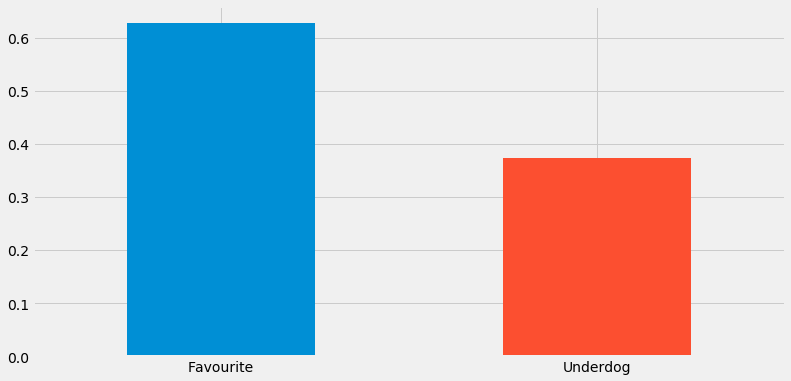

In [47]:
Favourite_win_percent.plot(kind='bar', rot=0)

In [48]:
Now we check the mean value of all columns and compare them in a bar graph to check for any patterns or anomalies.

SyntaxError: invalid syntax (<ipython-input-48-c6fb7402e5f0>, line 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e36f320>,
      dtype=object)

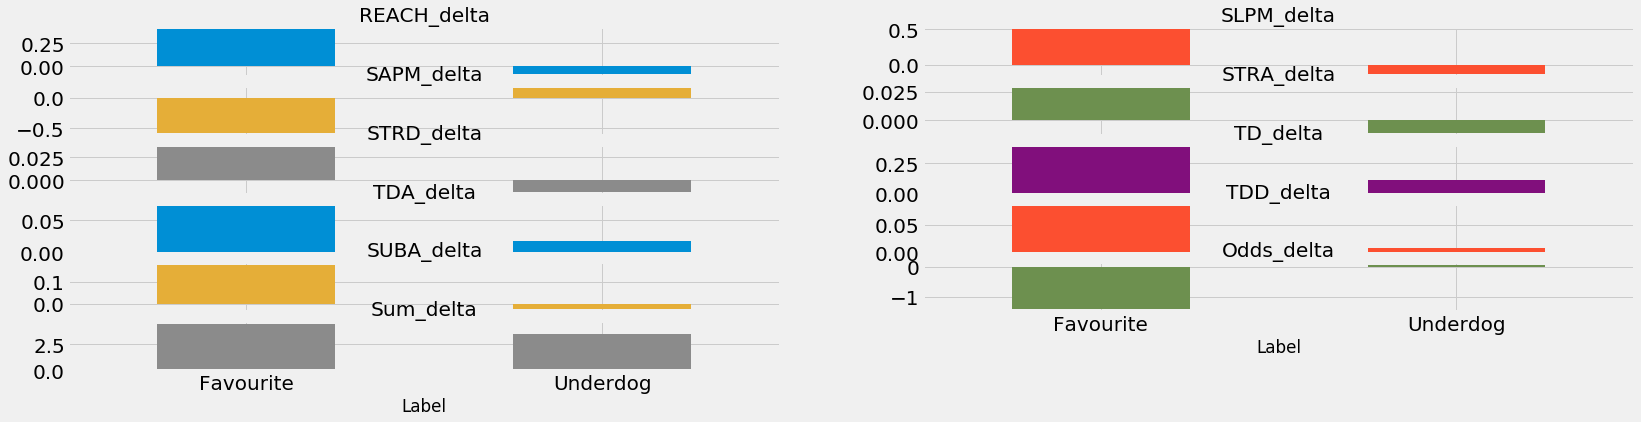

In [49]:
# Does mean of each feature distinguish the Favourite / Underdog to win ?
# Does a specific feature advantage give the underdog winners an edge ?
df.groupby('Label').mean().plot(kind = 'bar', subplots=True, layout=(20,2), legend=False, figsize=(25,20), fontsize=20, rot=0)

In [50]:
def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

# Correlation Matrix
df_corr = create_dummies(df, 'Label').drop('Label_Underdog', axis = 1)
corr = df_corr.corr()
corr = (corr)
corr

,REACH_delta,SLPM_delta,SAPM_delta,STRA_delta,STRD_delta,TD_delta,TDA_delta,TDD_delta,SUBA_delta,Odds_delta,Sum_delta,Label_Favourite
REACH_delta,1.000000,0.037076,-0.077292,-0.042400,-0.090796,-0.078721,0.027693,-0.072749,0.060381,-0.030485,-0.044349,0.070252
SLPM_delta,0.037076,1.000000,0.089550,0.361854,0.268306,-0.167199,0.041915,0.195507,-0.167117,-0.154969,0.422291,0.205441
SAPM_delta,-0.077292,0.089550,1.000000,-0.298355,-0.412943,-0.280762,-0.230730,-0.064397,-0.040124,0.148382,-0.006268,-0.226802
STRA_delta,-0.042400,0.361854,-0.298355,1.000000,0.114704,0.202333,0.246022,0.143988,0.038443,-0.103734,0.356671,0.168435
STRD_delta,-0.090796,0.268306,-0.412943,0.114704,1.000000,0.043988,0.128065,0.188816,-0.153664,-0.111798,0.094411,0.220450
TD_delta,-0.078721,-0.167199,-0.280762,0.202333,0.043988,1.000000,0.427436,0.003178,0.192474,-0.072800,0.635365,0.067313
TDA_delta,0.027693,0.041915,-0.230730,0.246022,0.128065,0.427436,1.000000,0.221375,0.098257,-0.106092,0.454456,0.091885
TDD_delta,-0.072749,0.195507,-0.064397,0.143988,0.188816,0.003178,0.221375,1.000000,-0.157317,-0.101961,0.183764,0.123448
SUBA_delta,0.060381,-0.167117,-0.040124,0.038443,-0.153664,0.192474,0.098257,-0.157317,1.000000,-0.047820,0.441608,0.085332
Odds_delta,-0.030485,-0.154969,0.148382,-0.103734,-0.111798,-0.072800,-0.106092,-0.101961,-0.047820,1.000000,-0.155038,-0.306930


In [51]:
heatmap() to check for collinearity between features.

SyntaxError: invalid syntax (<ipython-input-51-f560eb8f0b6f>, line 1)

In [ ]:
#HeatMap
plt.figure(figsize=(15,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [52]:
# Comparing both means

print('STRD_delta mean of favourite winners is: ' +  '{}' .format(df['STRD_delta'][df['Label'] == 'Favourite'].mean()))
print('STRD_delta mean of undersog winners is: ' + '{}'.format(df['STRD_delta'][df['Label'] == 'Underdog'].mean()))

# However, is the marginal difference of 0.047 significant?From the correlation matrix, we know that:

#Predictors are not too correlated with each other. Low possibility of multicollinearity. Not too much of a worry if regression is applied
#Positive correlation to strikes landed, striking defense to make a favourite more favourable to win

STRD_delta mean of favourite winners is: 0.03570909090909091
STRD_delta mean of undersog winners is: -0.012122448979591837


From the correlation matrix, we know that:

Predictors are not too correlated with each other. Low possibility of multicollinearity. Not too much of a worry if regression is applied
Positive correlation to strikes landed, striking defense to make a favourite more favourable to win

In [53]:
# T-test
stats.ttest_1samp(a=  df[df['Label']=='Favourite']['STRD_delta'], # Sample of Favourite winners
                  popmean = df['STRD_delta'].mean())  # Fighter population mean

Ttest_1sampResult(statistic=4.987525562089511, pvalue=7.459987627406486e-07)

In [54]:
We check the Violin plot of the features to look at the upper and lower quartiles of the columns.

SyntaxError: invalid syntax (<ipython-input-54-b4c68d328829>, line 1)

In [55]:
# Critical point 
degree_freedom = len(df[df['Label']=='Favourite'])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.962843616296083
The t-distribution right quartile range is: 1.9628436162960825


In [56]:
We drop the columns having object data types.

SyntaxError: invalid syntax (<ipython-input-56-c55ec943e8c9>, line 1)

In [57]:
cols = df.drop(['Events', 'Favourite', 'Underdog', 'Label'], axis =1).columns.tolist()

IndexError: index 2 is out of bounds for axis 0 with size 2

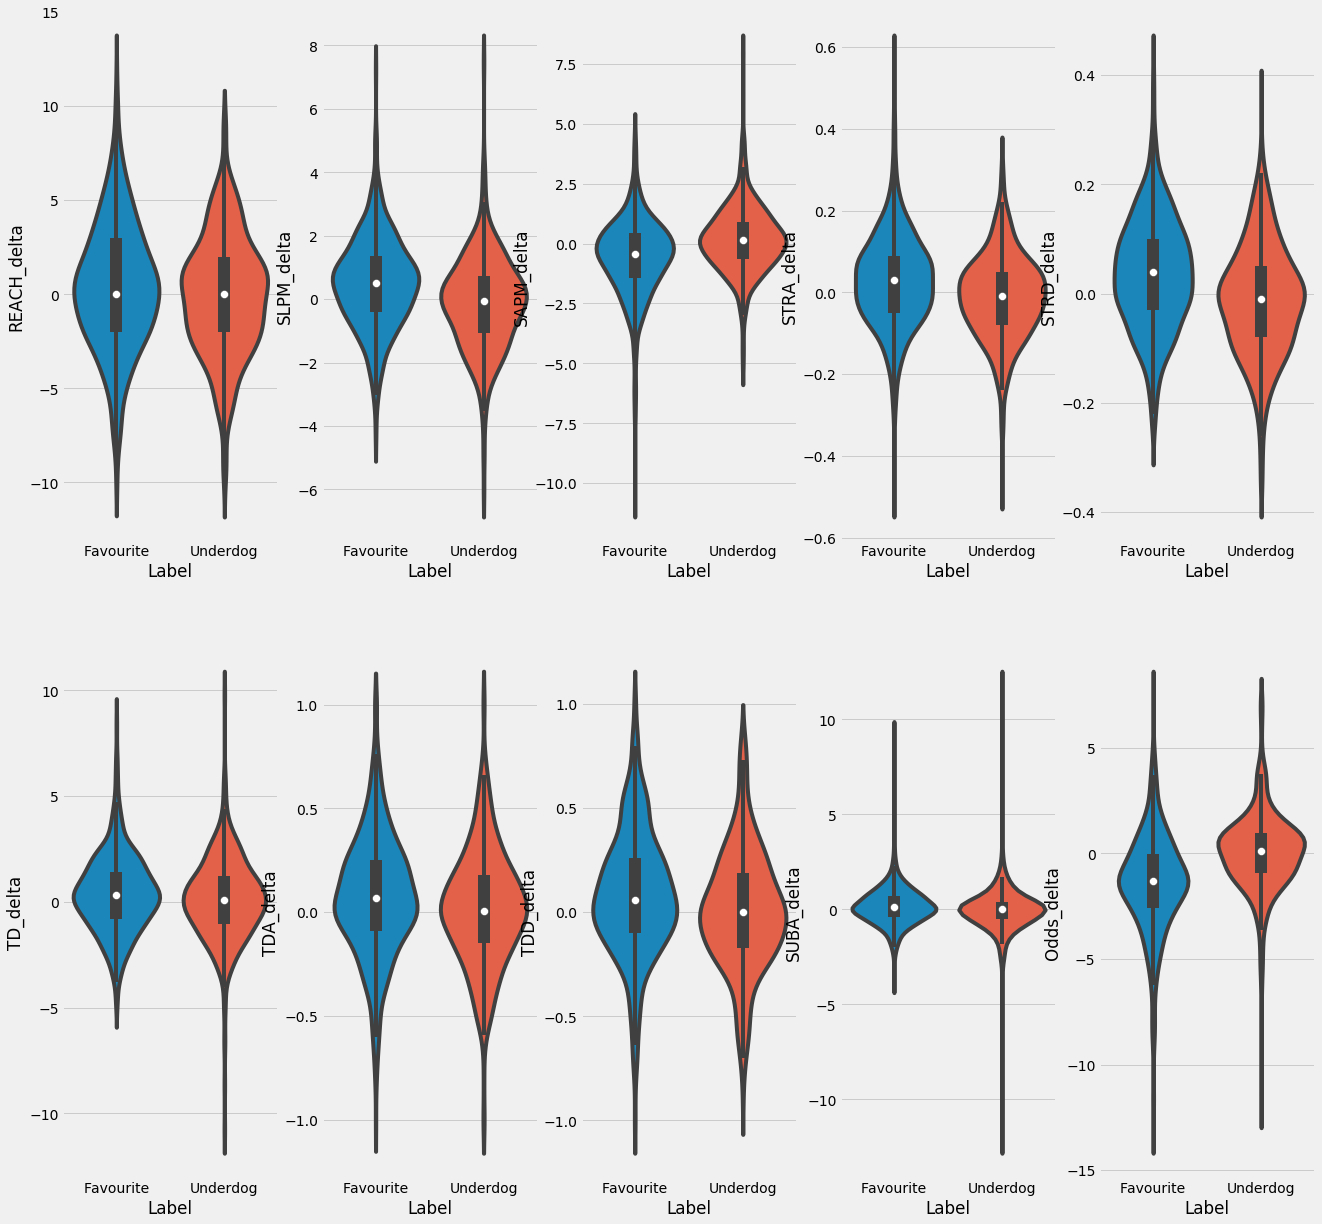

In [58]:
# create 10 plots with a 2 by 5 dimension subplots
fig, ax = plt.subplots(2,5, figsize=(20,20))

# loop to plot in subplots
for i, col in enumerate(cols):
    x = i // 5
    y = i % 5
    sns.violinplot(x="Label", y=col , data=df, order=["Favourite", "Underdog"], ax=ax[x,y])


Feature Selection
Feature selection is the process of selecting a subset of relevant predictors for use in model construction. Feature selection is used for:

Simplification of models to make them easier to interpret
Shorter training times (applicable to very huge datasets)
To avoid the curse of dimensionality
Enhanced generalization by reducing overfitting (reduction of variance)


The features will be selected based on Recursive Feature Elimination with Cross Validation (RFECV). Recursive Feature Elimination (RFE) works by training the model, evaluating it, then removing the least significant features, and repeating.

In [59]:
# Create a function to select features
# Note that feature names are stored in cols

def select_features(df):
    all_X = df.drop(['Events', 'Favourite', 'Underdog', 'Label'], axis=1)
    all_y = df['Label']
    
    clf = RandomForestClassifier(random_state=1)
    selector = RFECV(clf)
    selector.fit(all_X, all_y)
    best_columns = list(all_X.columns[selector.support_])
    print('Best Columns \n' + '-'*12 + '\n' + '{}'.format(best_columns))
    
    return best_columns

In [60]:
best_cols = select_features(df)

Best Columns 
------------
['SLPM_delta', 'SAPM_delta', 'STRA_delta', 'STRD_delta', 'TD_delta', 'TDD_delta', 'Odds_delta', 'Sum_delta']


Feature Importance:
As expected Reach_delta is of least importance since reach does not really determine a clear winner. The graph plots the feature importance. This analysis is crucial and in real life can be used by coaches to train their fighters in these aspects.

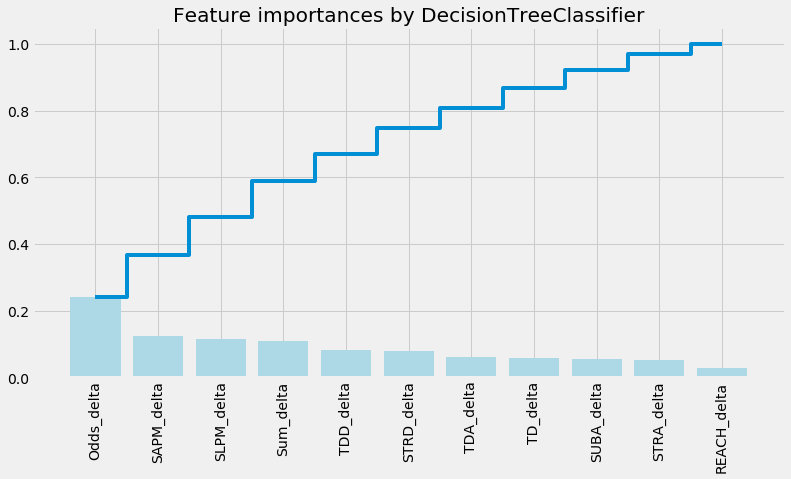

In [61]:

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Create train and test splits
target_name = 'Label'
X = df.drop(['Events', 'Favourite', 'Underdog', 'Label'], axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=1, stratify=y)

dtree = RandomForestClassifier(
    #max_depth=3,
    random_state = 1,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['Events', 'Favourite', 'Underdog', 'Label'], axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Model selection and hyperparameter tuning were accomplish using GridSearchCV
GridSearchCV is the traditional way of automating performing hyperparameter optimization checking accuracies for different models and hyperparameters.
The models were selected on basis of previous analysis of classification algorithms and the hyperperameters were selected by selecting the best 3 by brute force.
There is no need to apply train_test_split in this case due to the Cross Validation embedded in GridSearchCV
Among the models considered are:
Logistic Regression
Random Forest Classifier
Neural Network (MLP)

In [62]:
def select_model(df, features):
    
    all_X = df[features]
    all_y = df["Label"]
    #create a list of dics which contains models and hyperparameters
    models = [
        
        {
            "name": "Logistic Regression",
            "estimator": LogisticRegression(),
            "hyperparameters":
            {
             "solver": ["newton-cg", "lbfgs", "liblinear"]   
            }
            
        },

        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        },
                {
            "name": "Multi Layer Perceptron (MLP)",
            "estimator": MLPClassifier(random_state=1),
            "hyperparameters":
                {
                    "hidden_layer_sizes": [(5,5), (10,10)],
                    "activation": ["relu", "tanh", "logistic"],
                    "solver": ['sgd', 'adam'],
                    "learning_rate": ["constant", "adaptive"]

                }
        }   
        
    ]
    
    for model in log_progress(models):
        print(model["name"])
        print("-"*len(model["name"]))
        
        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10, scoring = 'accuracy')
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_
        model["scoring"] = grid.scorer_
        
        print("Best Paramerters:\n" + "{}".format(model["best_params"]))
        print("Best Score:\n" + "{}".format(model["best_score"]))
        print("Best Model:\n" + "{}\n".format(model["best_model"]))
        print("Scoring method:\n" + "{}\n".format(model["scoring"]))
        
    return models

In [63]:
models = select_model(df, best_cols)

Logistic Regression
-------------------
Best Paramerters:
{'solver': 'newton-cg'}
Best Score:
0.6927756653992395
Best Model:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

Scoring method:
make_scorer(accuracy_score)

RandomForestClassifier
----------------------
Best Paramerters:
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 4}
Best Score:
0.6988593155893537
Best Model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=

Final Model Verdict:
Neural Network (MLP) gives us best accuracy of 70%. Thus we accomplished both our valuations of success which are :
1) Accuracy > 50% (Base Condition) 
2) Accuracy > 63% (Bookies Odds)

CONCLUSION

Neural Network (MLP) gives the highest score. Note that not too many hidden layers was chosen due to efficiency and also potential overfitting. The final model selected, Neural Network (MLP) to predict winners from Favourite and Underdog has an accuracy of 70.4%. This project successfully satisfied the crucial objective which was to achieve an accuracy of more than 50%.

IMPROVEMENTS

1) The sport of MMA having it's inception in 1993, is very young as compared to boxing and with an increase in number of fights, there will be more data and more complete data for us to work with.
2) To include the coaching 'camp' for each fighter.
3) Better structured odds.
4) Improve data quality.
5) Updating data on interval basis to omit retired fighters.
6) Social Media Analytics

CITATIONS

Copyright <2018> <Karan Kathayat, Siddharth Vale>
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Copyright <2018> <Karan Kathayat, Siddharth Vale>
You are free to:
Share — copy and redistribute the material in any medium or format 
Adapt — remix, transform, and build upon the material 
for any purpose, even commercially. 

 
The licensor cannot revoke these freedoms as long as you follow the license terms.

Under the following terms:
Attribution — You must give appropriate credit, provide a link to the license, and indicate if changes were made. You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use. 
No additional restrictions — You may not apply legal terms or technological measures that legally restrict others from doing anything the license permits. 

Notices: 
You do not have to comply with the license for elements of the material in the public domain or where your use is permitted by an applicable exception or limitation. 
No warranties are given. The license may not give you all of the permissions necessary for your intended use. For example, other rights such as publicity, privacy, or moral rights may limit how you use the material. 